In [10]:
import edhec_risk_kit as erk
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180
mpl.rcParams['figure.figsize'] = (9, 4)
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
ind = erk.get_hfi_returns()["2000":]
er = erk.annualize_rets(ind["2000":], 12)
cov = ind["2000":].cov()

In [27]:
# Q1
erk.var_gaussian(ind["Distressed Securities"],level=1)

0.031430176939280456

In [28]:
# Q2
erk.var_gaussian(ind["Distressed Securities"],level=1, modified=True)

0.04966909110627921

In [29]:
# Q3
erk.var_historic(ind["Distressed Securities"],level=1)

0.042642

In [53]:
# Q4
ind = erk.get_ind_returns()["2013":"2017"]
er = erk.annualize_rets(ind,12)
cov = ind.cov()

[0.25 0.25 0.25 0.25]


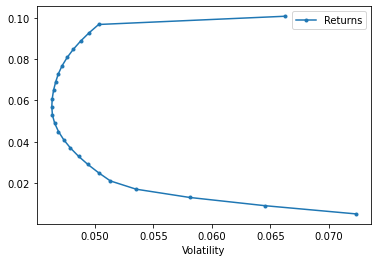

In [62]:
l = ["Books","Steel","Oil","Mines"]
erk.plot_ef(25,er[l],cov.loc[l,l])

n = len(er[l])
w_ew = np.repeat(1/n, n)
print(w_ew)
#r_ew = portfolio_returns(w_ew, er[l])
#vol_ew = portfolio_vol(w_ew, cov.loc[l,l])

In [63]:
# Q5-Q7
#print(er[l])
erk.msr(0.10,er[l],cov.loc[l,l])

array([2.48759346e-15, 1.00000000e+00, 1.77809156e-16, 0.00000000e+00])

In [64]:
# Q8
erk.gmv(cov.loc[l,l])

array([0.47702485, 0.        , 0.43411204, 0.08886311])

In [65]:
# Q9
w_msr = erk.msr(0.10,er[l],cov.loc[l,l])

cov_2018 = erk.get_ind_returns()["2018"].cov()
vol_2018 = erk.portfolio_vol(w_msr,cov_2018.loc[l,l])
vol_2018

#wrong

0.0634623074722072

In [66]:
# Q10
w_gmv = erk.gmv(cov.loc[l,l])

cov_2018 = erk.get_ind_returns()["2018"].cov()
vol_2018 = erk.portfolio_vol(w_gmv,cov_2018.loc[l,l])
vol_2018

#wrong

0.05477245397965808